### 1 vs 2 controls

Runs adjusting for 1 control (Diffusivity, $D$) vs adjusting for two controls (Diffusivity $D$ and albedo $\alpha$)

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import netCDF4 as nc
#import climlab
#from climlab import constants as const

In [20]:
def get_field(varname, exp, dir_path):
    filename = dir_path+exp+varname+'.txt'
    field = pd.read_csv(filename, header=None)
    return(field)

In [21]:
# Set context for plots 'talk' or 'notebook'
sns.set_context('talk')

# get temperature from NCEP Reanalysis (the "observations" we want to adjust towards)
filencep = '/efs_ecco/kramosmu/FLOW/ESS25_AD/noah/budyko_sellers_DA/DA_results/T_zonalmean_NCEP.dat'
temp_ncep = pd.read_csv(filencep, header=None)

# Directories for runs with 1 control and 2 controls
dir_path1 = '/efs_ecco/kramosmu/FLOW/ESS25_AD/noah/budyko_sellers_DA/' # one contol
dir_path2 = '/efs_ecco/kramosmu/FLOW/ESS25_AD/budyko_sellers_DA_NR/' # two controls
dir_path3 = '/efs_ecco/nrosenbe/bs_DA_albedo_constrained/' # two controls
dir_path4 = '/efs_ecco/nrosenbe/ESS25-Team_FLOW/' # two controls

exp = 'DA_results/'

# Get fields
lat = get_field('latitude', exp, dir_path1)
temp1 = get_field('temperature', exp, dir_path1)
temp2 = get_field('temperature', exp, dir_path2)
temp3 = get_field('temperature', exp, dir_path3)

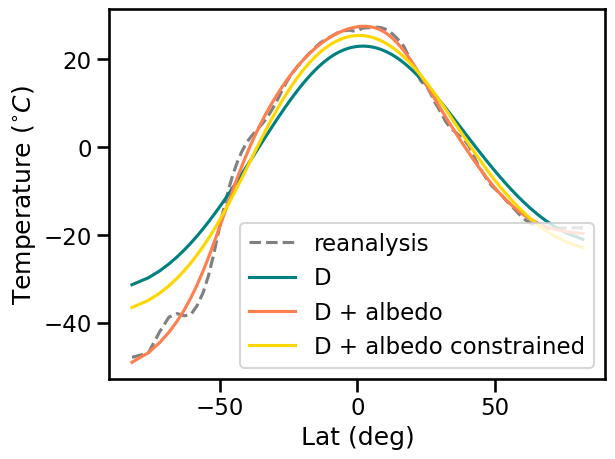

In [22]:
fig, (ax) = plt.subplots(1,1)
ax.plot(lat,temp_ncep, '--',color='0.5', label='reanalysis')
ax.plot(lat,temp1-273, label='D', color='teal')
ax.plot(lat,temp2-273, label='D + albedo', color='coral' )
ax.plot(lat,temp3-273, label='D + albedo constrained', color='gold' )

ax.set_xlabel('Lat (deg)')
ax.set_ylabel(r'Temperature ($^{\circ}C$)')

plt.legend()

### Albedo

* The coral line shows the albedo resulting form the optimization in the run with two controls. It looks a bit like the actual mean albedo but note that ir reaches values above 1 and below zero. We need to add constrains to it.

* The teal line is the original albedo set in the model. It stays constant throughout the optimization iterations in the run where diffusivity is the only control.


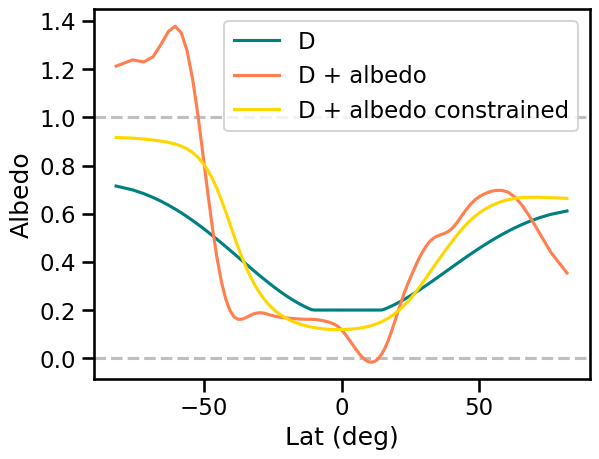

In [23]:
alpha1 = get_field('albedo', exp, dir_path1)
alpha2 = get_field('albedo', exp, dir_path2)
alpha3 = get_field('albedo', exp, dir_path3)

fig, (ax) = plt.subplots(1,1)
ax.axhline(1, linestyle='--', alpha=0.5, color='0.5')
ax.axhline(0, linestyle='--', alpha=0.5, color='0.5')
ax.plot(lat,alpha1 ,label='D', color='teal')
ax.plot(lat,alpha2, label='D + albedo', color='coral' )
ax.plot(lat,alpha3, label='D + albedo constrained', color='gold' )

ax.set_xlabel('Lat (deg)')
ax.set_ylabel(r'Albedo')
plt.legend()

### Different flux contributions: incoming and outgoing radiation and meridional diffusivity of heat

(-85.0, 85.0)

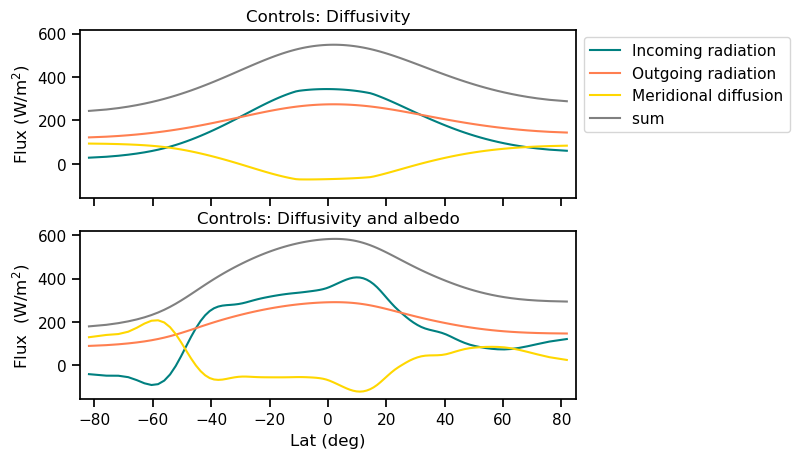

In [8]:
F_in1 = get_field('F_in', exp, dir_path1)
F_in2 = get_field('F_in', exp, dir_path2)
F_out1 = get_field('F_out', exp, dir_path1)
F_out2 = get_field('F_out', exp, dir_path2)
F_diff1 = get_field('F_diff', exp, dir_path1)
F_diff2 = get_field('F_diff', exp, dir_path2)

fig, (ax,ax2) = plt.subplots(2,1, sharex=True, sharey=True)
ax.plot(lat,F_in1, label='Incoming radiation', color='teal')
ax2.plot(lat,F_in2,'-', label='Incoming radiation', color='teal' )
ax.plot(lat,F_out1, label='Outgoing radiation', color='coral')
ax2.plot(lat,F_out2,'-', label='Outgoing radiation', color='coral' )
ax.plot(lat,F_diff1, label='Meridional diffusion', color='gold')
ax2.plot(lat,F_diff2,'-', label='Meridional diffusion', color='gold' )
ax.plot(lat,F_in1+F_out1+F_diff1,'-', label='sum ', color='0.5' )
ax2.plot(lat,F_in2+F_out2+F_diff2,'-', label='sum ', color='0.5' )

ax2.set_xlabel('Lat (deg)')
ax.set_ylabel(r'Flux (W/m$^2$)')
ax2.set_ylabel(r'Flux  (W/m$^2$)')
ax.set_title('Controls: Diffusivity')
ax2.set_title('Controls: Diffusivity and albedo')
ax.legend(bbox_to_anchor=(1,1))
ax.set_xlim(-85,85)

### Cost function

We have changed the cost from being the difference between T at the Equator and the Poles to be the L2 norm between NCEP mean T and the model T at each latitude. We should save these for each iteration.

In [12]:
J1 = get_field('J', exp, dir_path1)
J2 = get_field('J', exp, dir_path2)
J3 = get_field('J', exp, dir_path3)

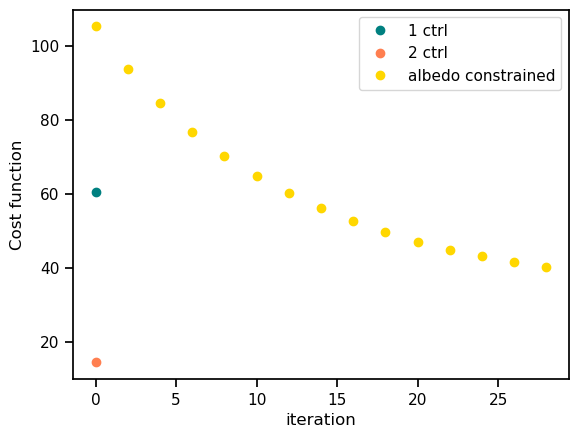

In [16]:
fig, (ax) = plt.subplots(1,1)
ax.plot(J1,'o', label='1 ctrl', color='teal' )
ax.plot(J2,'o', label='2 ctrl', color='coral' )
ax.plot(J3[::2],'o', label='albedo constrained', color='gold' )

ax.set_ylabel(r'Cost function')
ax.set_xlabel('iteration')
ax.legend(bbox_to_anchor=(1,1))